In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os
import csv

In [2]:
def make_plot_df(data, axes, m, legend_names):
#     axes.set_title(f"R={data['R'].iloc[0]}")
#     axes[i].set_xlabel()
    m1 = axes.errorbar(data['d'], data['field'], yerr = data['err'])
    m.append(m1)
#     print(data['R'].iloc[0])
    legend_names.append(f"R={data['R'].iloc[0]}")

In [74]:
def make_plot_together(data, mu, conf_size):
    fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize=(8, 6))
#     if len(data) == 1:
#         axes = [axes]
#     for i in range(len(data)):
    m = []
    legend_names = []
#     print(data)
    data.groupby('R').apply(make_plot_df, axes, m, legend_names)
    axes.set_xlabel('d')
    axes.set_ylabel(r"$<E^{2}>$")
    axes.set_title('electric field')
    axes.legend(m, legend_names)
    plt.savefig(f"../images/flux_tube/qc2dstag/{conf_size}/HYP_APE/mu{mu}/electric_T={data['T'].iloc[0]}", dpi=400)
#     plt.show()

In [75]:
df_data_40_5 = pd.read_csv(f"../result/flux_tube/qc2dstag/40^4/HYP_APE/flux_tube_mu=0.05.csv", index_col=None)
# df_data = df_data.loc[df_data['T'] == 8]
df_data_40_5 = df_data_40_5.loc[df_data_40_5['R'] != 18]
df_data_40_5 = df_data_40_5.loc[df_data_40_5['R'] != 16]

""


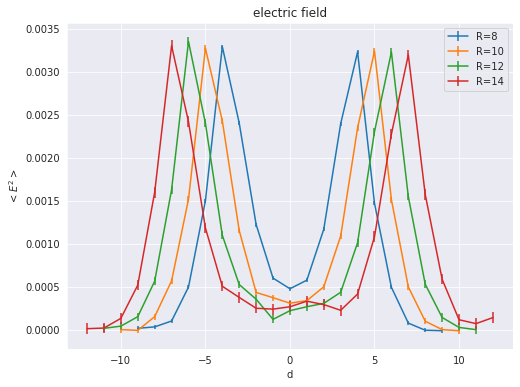

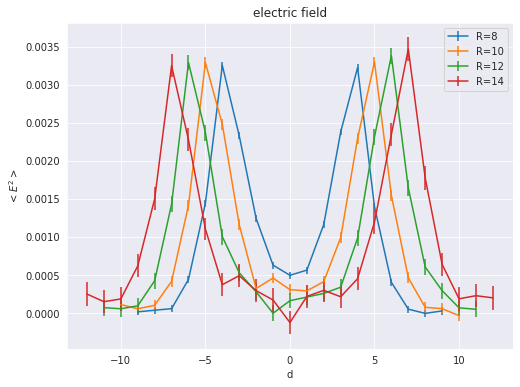

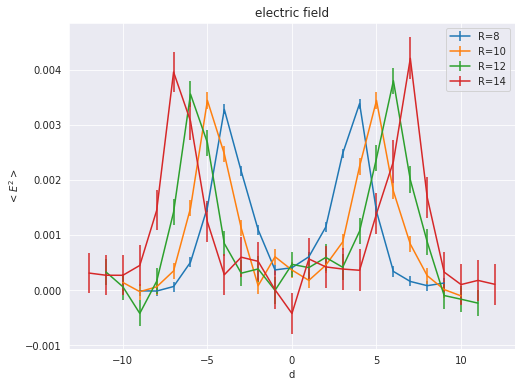

In [76]:
df_data_40_5.groupby(['T']).apply(make_plot_together, '0.05', '40^4')

In [77]:
df_data_40_25 = pd.read_csv(f"../result/flux_tube/qc2dstag/40^4/HYP_APE/flux_tube_mu=0.25.csv", index_col=None)
df_data_40_25 = df_data_40_25.loc[df_data_40_25['R'] != 18]

""


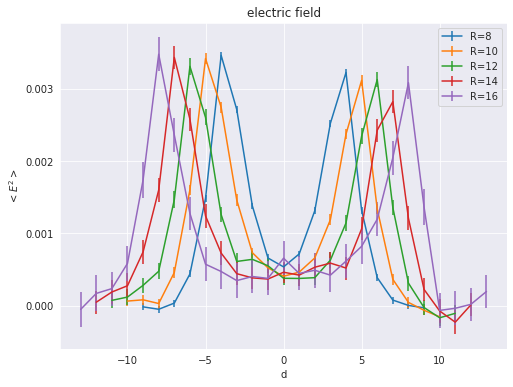

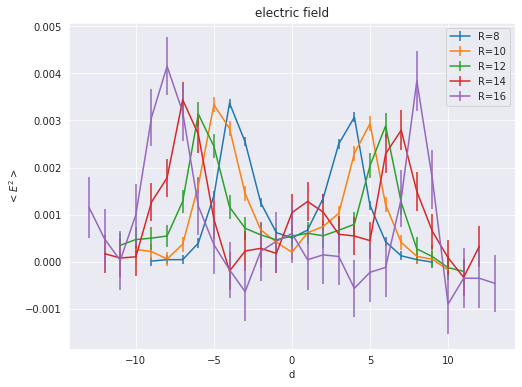

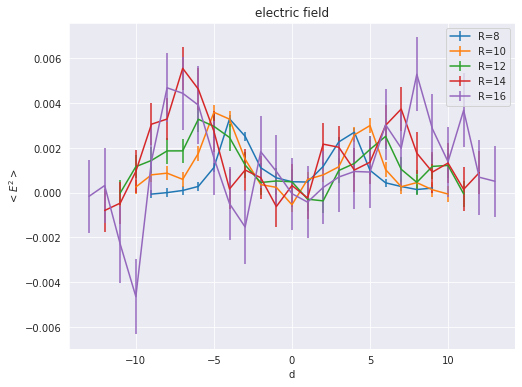

In [78]:
df_data_40_25.groupby(['T']).apply(make_plot_together, '0.25', '40^4')

In [79]:
df_data_40_45 = pd.read_csv(f"../result/flux_tube/qc2dstag/40^4/HYP_APE/flux_tube_mu=0.45.csv", index_col=None)


""


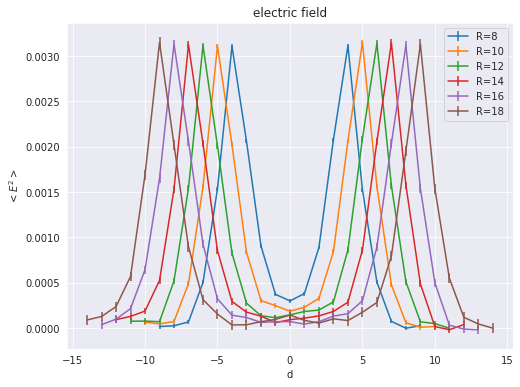

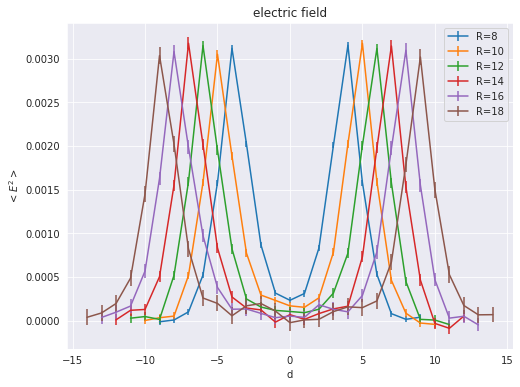

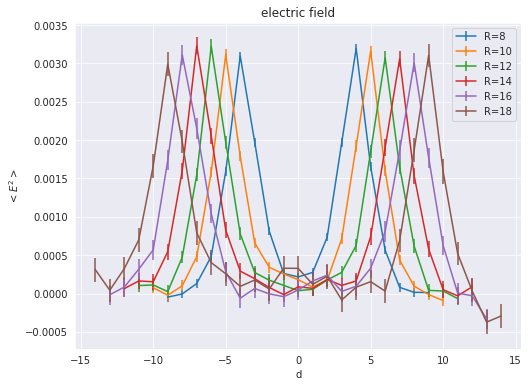

In [80]:
df_data_40_45.groupby(['T']).apply(make_plot_together, '0.45', '40^4')

In [81]:
df_data_32_0 = pd.read_csv(f"../result/flux_tube/qc2dstag/32^4/HYP_APE/flux_tube_mu=0.00.csv", index_col=None)
df_data_32_0 = df_data_32_0.loc[df_data_32_0['R'] != 18]
df_data_32_0 = df_data_32_0.loc[df_data_32_0['R'] != 16]

""


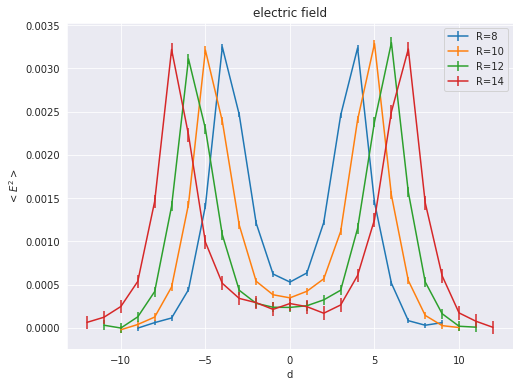

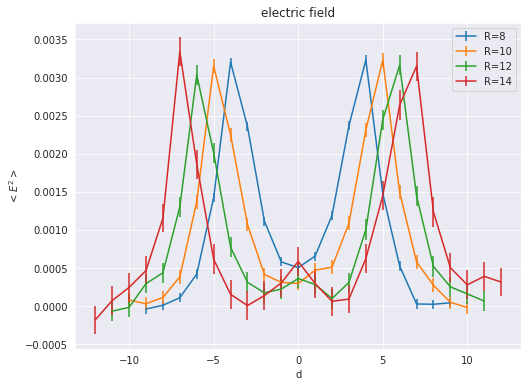

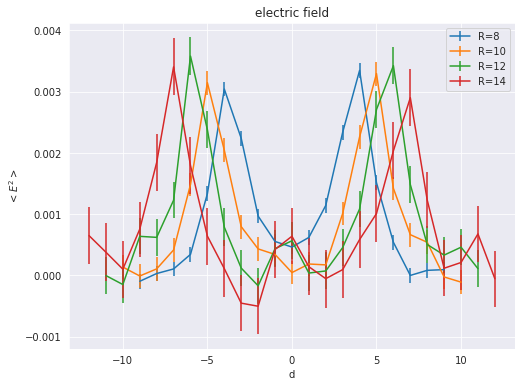

In [82]:
df_data_32_0.groupby(['T']).apply(make_plot_together, '0.00', '32^4')

In [87]:
df_data_32_25 = pd.read_csv(f"../result/flux_tube/qc2dstag/32^4/HYP_APE/flux_tube_mu=0.25.csv", index_col=None)
df_data_32_25 = df_data_32_25.loc[df_data_32_25['R'] != 18]
#df_data_32_25 = df_data_32_25.loc[df_data_32_25['R'] != 16]

""


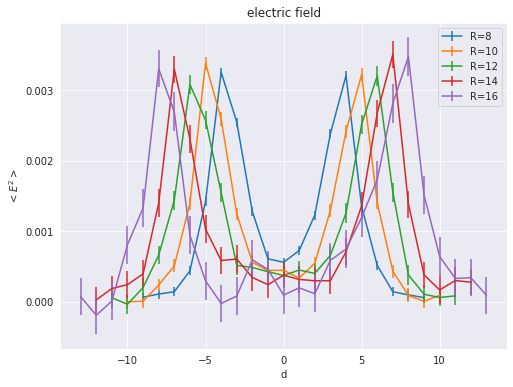

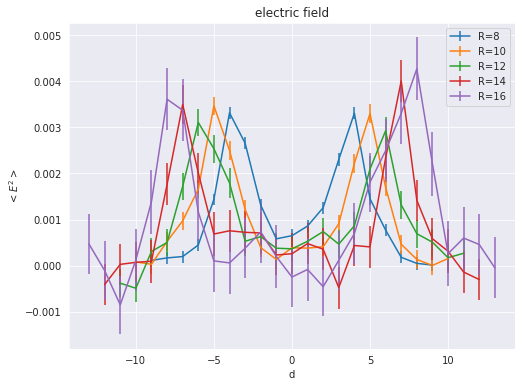

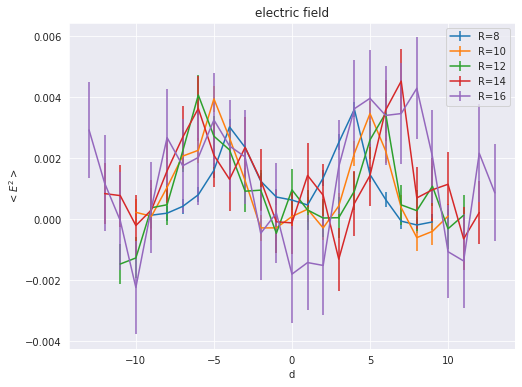

In [88]:
df_data_32_25.groupby(['T']).apply(make_plot_together, '0.25', '32^4')

In [85]:
df_data_32_40 = pd.read_csv(f"../result/flux_tube/qc2dstag/32^4/HYP_APE/flux_tube_mu=0.40.csv", index_col=None)
df_data_32_25 = df_data_32_25.loc[df_data_32_25['R'] != 18]

""


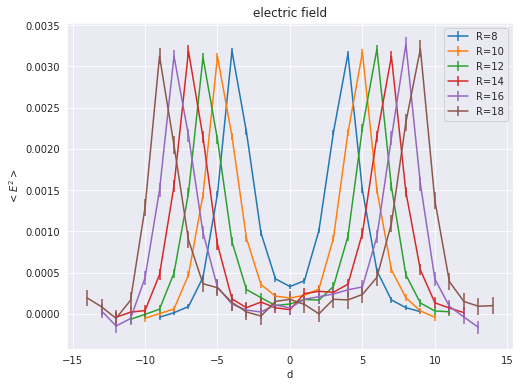

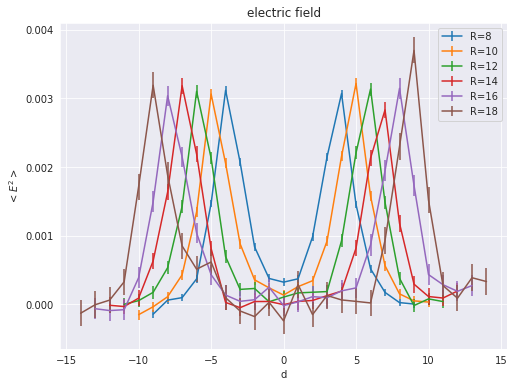

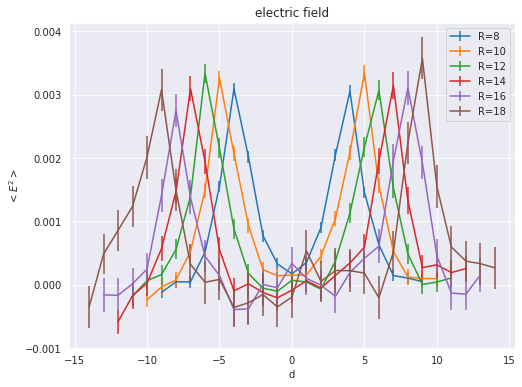

In [86]:
df_data_32_40.groupby(['T']).apply(make_plot_together, '0.40', '32^4')

In [73]:
def read_file(file_name):
    array = np.loadtxt(file_name)
    data = list(zip(*array))
    return data

def data_plot(mu, T, R, plaket): #build plot for longitudinal
    w=mu//10
    q=mu-w*10
    print(T, R)
    data= read_file('/home/ilya/lattice/flux_tube/result/' + plaket + '/longitudinal/time_32/mu0.%d%d/electric_T=%d_R=%d' % (w, q, T, R))
#     plt.plot(data[0], data[1], 'o')
    plt.errorbar(data[0], data[1], yerr=data[2])
    plt.show()
    plt.clf()

In [3]:
def T_dependence(mu, R, T, delta): # make plot of T dependence
    w=mu//10
    q=mu-w*10
    t = []
    field = []
    field_err = []
    plaket = 'unsmeared_plaket'
    for i in T:
        data= read_file('/home/ilya/lattice/flux_tube/result/' + plaket + '/longitudinal/time_32/mu0.%d%d/electric_T=%d_R=%d' % (w, q, i, R))
        t.append(i)
        field.append(data[1][R//2 + 5 + delta])
        field_err.append(data[2][R//2 + 5 + delta])
    plt.errorbar(t, field, yerr=field_err)
    plt.show()
    plt.clf()

In [4]:
def plot_multiple(data, data_names, data_xlabel, data_ylabel, legend_names): # plot several results together
    plot_num = len(data)
    fig, axes = plt.subplots(nrows = 1, ncols = plot_num, sharey = True, figsize=(12,7))
    if len(data) == 1:
        axes = [axes]
    for i in range(len(data)):
        m = []
        axes[i].set_title(data_names[i])
        axes[i].set_xlabel(data_xlabel)
        if i==0:
            axes[i].set_ylabel(data_ylabel)
        for j in range(len(data[i])):
            m1 = axes[i].errorbar(data[i][j][0], data[i][j][1], yerr = data[i][j][2])
            m.append(m1)
        if i == (len(data)-1):
            axes[i].legend(m, legend_names)
    
    #plt.show()
    #plt.clf()
    
def make_plots_R(mu, T, R, data_xlabel, data_ylabel, titles, types, direction):
    w=mu//10
    q=mu-w*10
    data = []
    data1 = []
    data2 = []
    legend_names = []
    for i in range(len(R)):
        legend_names.append('R=%d' % (R[i]))
        data1.append(read_file('/home/ilya/lattice/flux_tube/result/unsmeared_plaket/' + direction + '/time_32/mu0.%d%d/' % (w, q) + types[0] + '_T=%d_R=%d' % (T, R[i])))
        data2.append(read_file('/home/ilya/lattice/flux_tube/result/unsmeared_plaket/' + direction + '/time_32/mu0.%d%d/' % (w, q) + types[1] + '_T=%d_R=%d' % (T, R[i])))
    data.append(data1)
    data.append(data2)
    plot_multiple(data, titles, data_xlabel, data_ylabel, legend_names)
    output = '/home/ilya/lattice/flux_tube/images/unsmeared_plaket/' + direction + '/mu0.%d%d/_T=%d_R=%d-%d' % (w, q, T, R[0], R[len(R)-1])
    plt.savefig(output)
    plt.show()
    plt.clf()

0 10


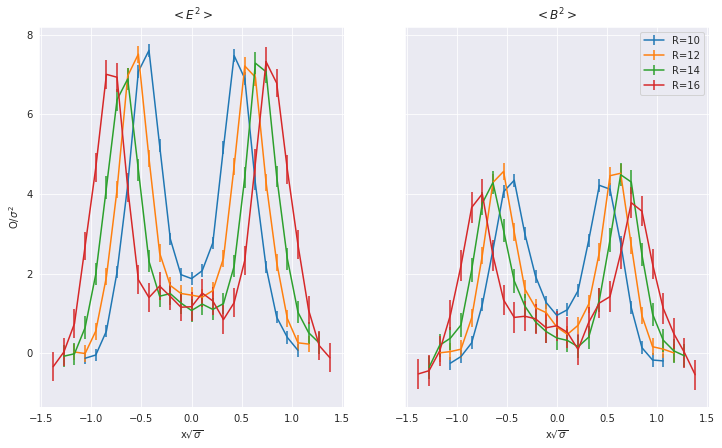

10 10


<Figure size 432x288 with 0 Axes>

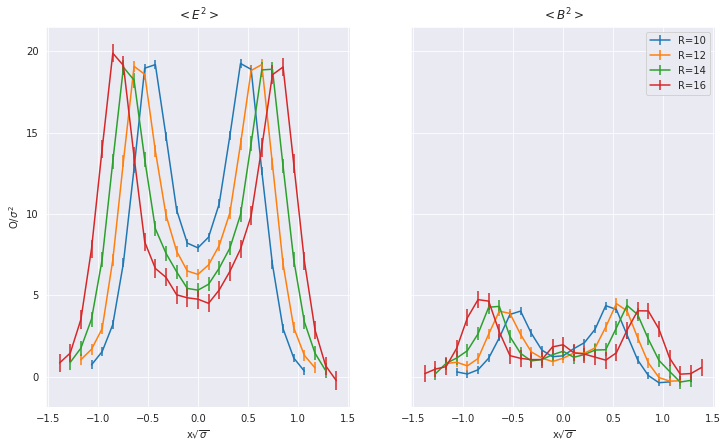

15 10


<Figure size 432x288 with 0 Axes>

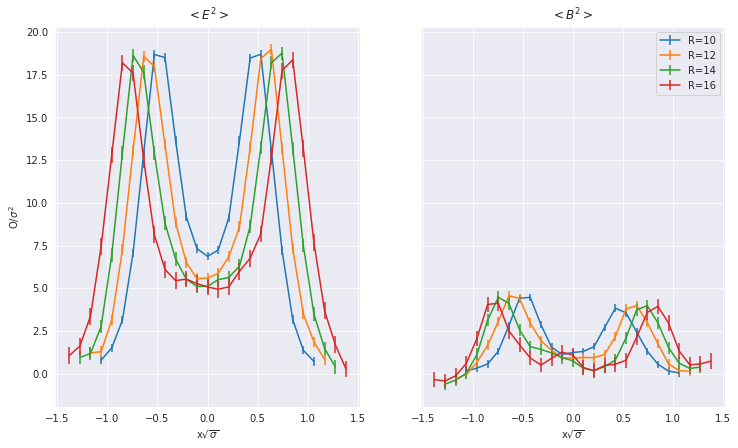

25 10


<Figure size 432x288 with 0 Axes>

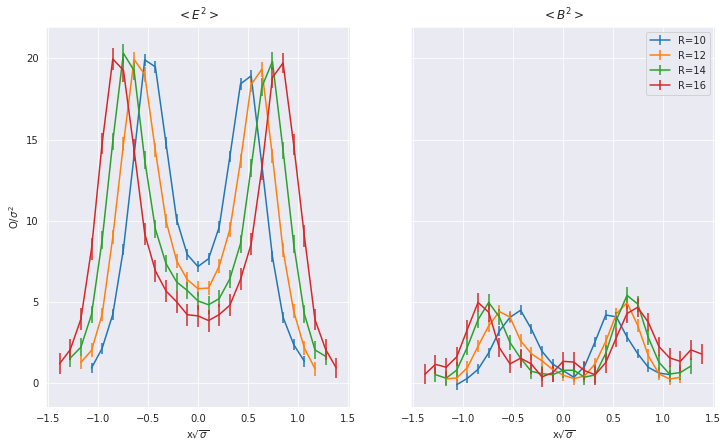

30 10


<Figure size 432x288 with 0 Axes>

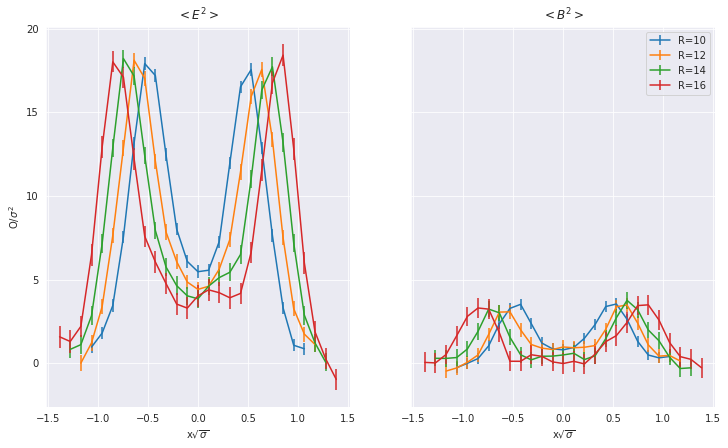

40 10


<Figure size 432x288 with 0 Axes>

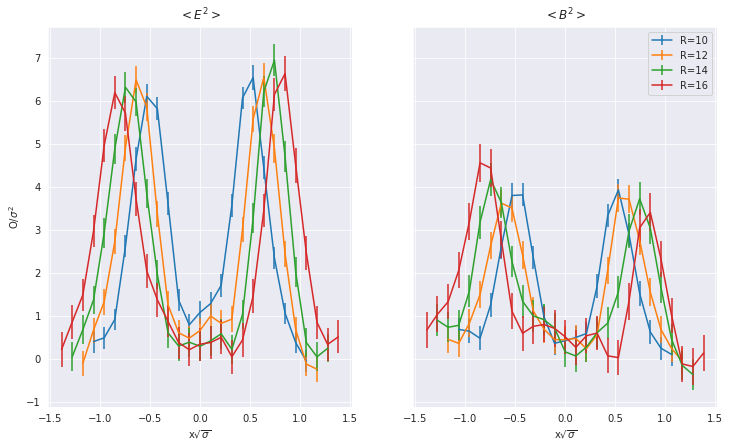

<Figure size 432x288 with 0 Axes>

In [27]:
mu1=[0, 10, 15, 25, 30, 40]
#mu1=[40]
T1=[10]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[10, 12, 14, 16]
        make_plots_R(mu, T, R, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", (r"$<E^{2}>$", r"$<B^{2}>$"), ('electric', 'magnetic'), 'longitudinal')

0 10


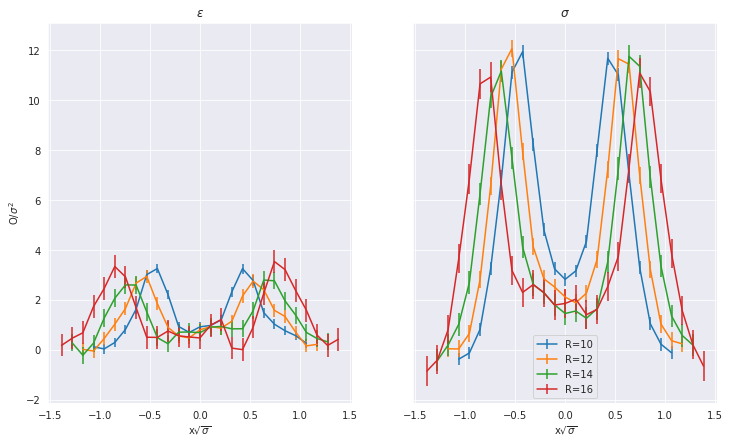

10 10


<Figure size 432x288 with 0 Axes>

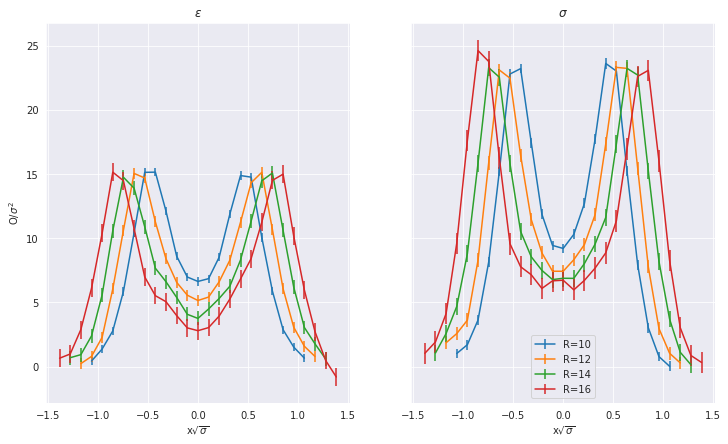

15 10


<Figure size 432x288 with 0 Axes>

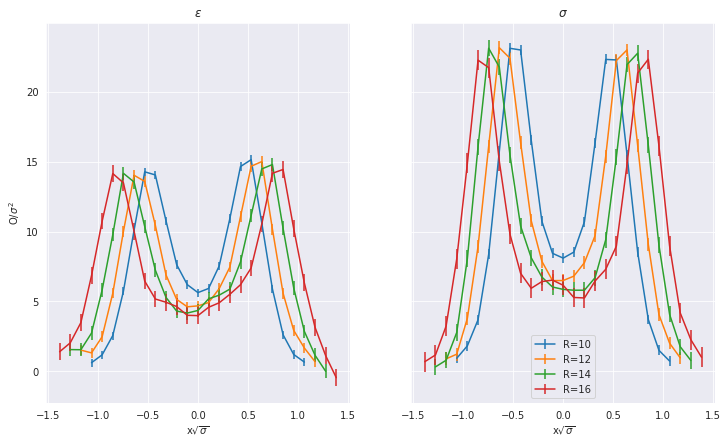

25 10


<Figure size 432x288 with 0 Axes>

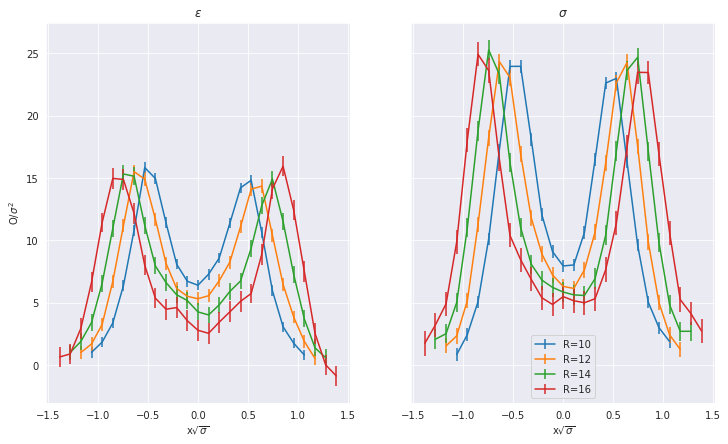

30 10


<Figure size 432x288 with 0 Axes>

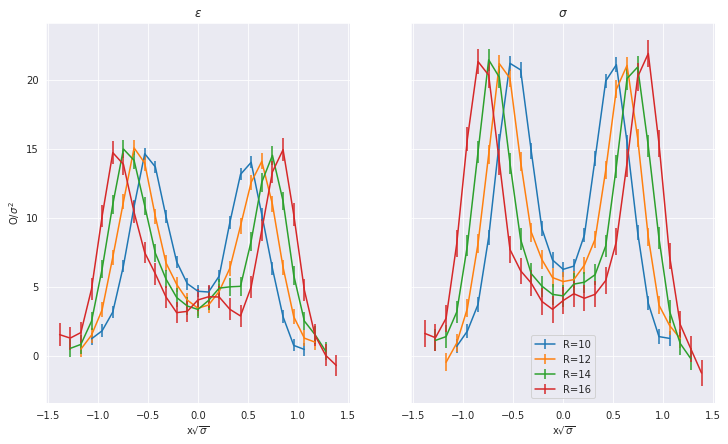

40 10


<Figure size 432x288 with 0 Axes>

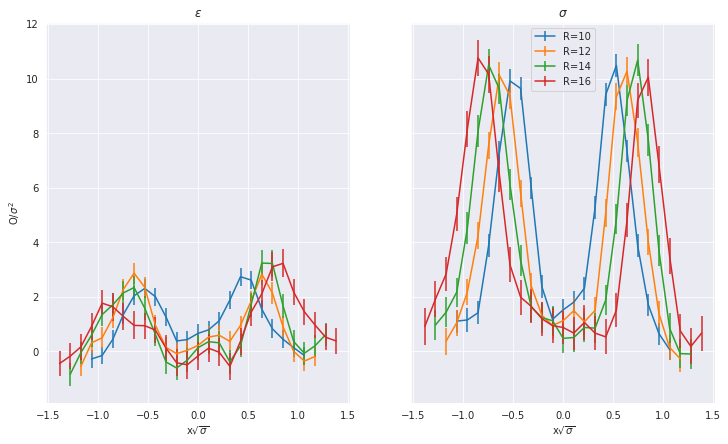

<Figure size 432x288 with 0 Axes>

In [28]:
mu1=[0, 10, 15, 25, 30, 40]
#mu1=[40]
T1=[10]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[10, 12, 14, 16]
        make_plots_R(mu, T, R, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", (r"$\epsilon$", r"$\sigma$"), ('energy', 'action'), 'longitudinal')

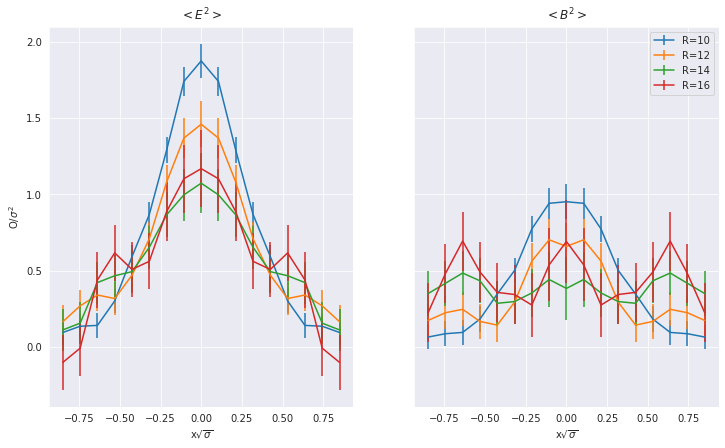

<Figure size 432x288 with 0 Axes>

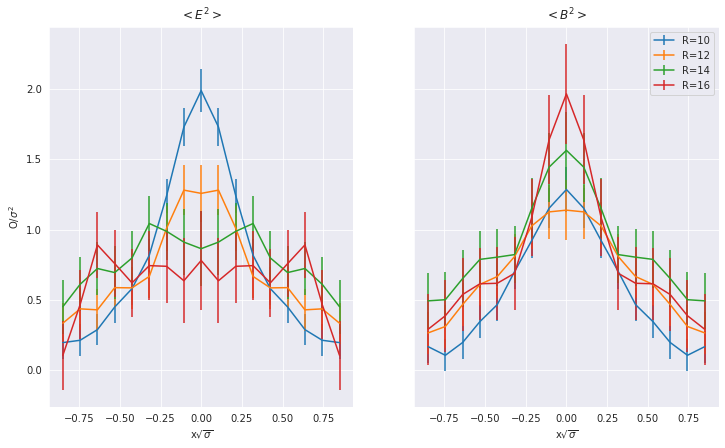

<Figure size 432x288 with 0 Axes>

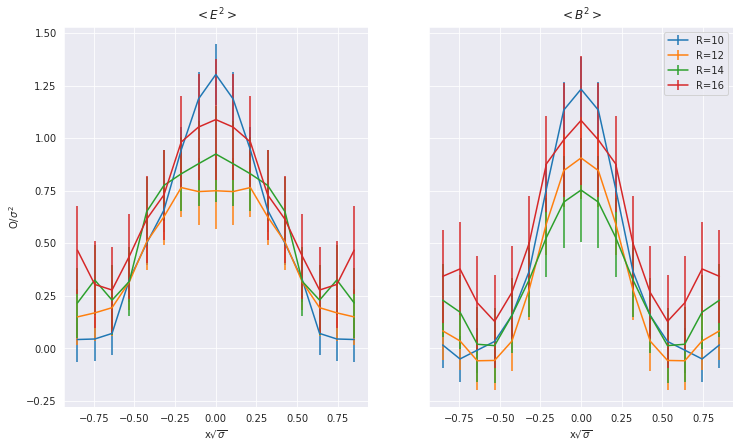

<Figure size 432x288 with 0 Axes>

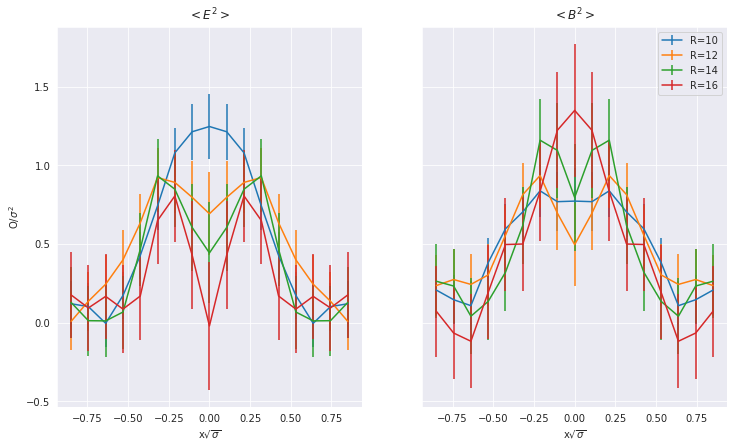

<Figure size 432x288 with 0 Axes>

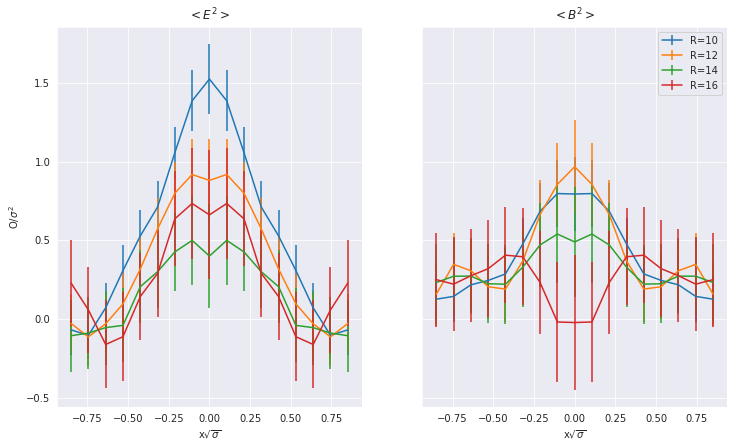

<Figure size 432x288 with 0 Axes>

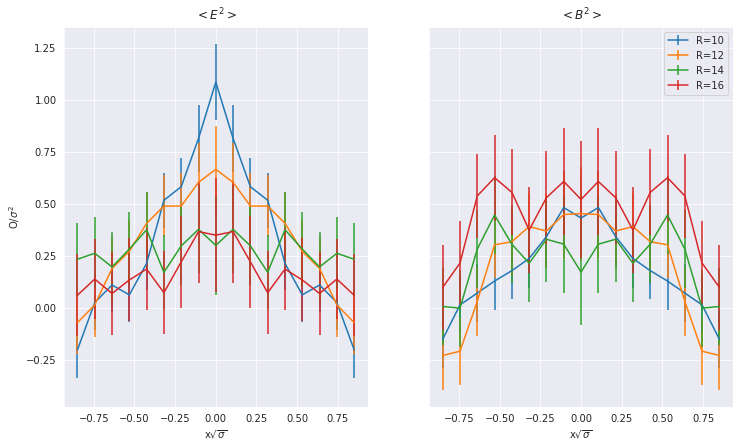

<Figure size 432x288 with 0 Axes>

In [32]:
mu1=[0, 10, 15, 25, 30, 40]
T1=[10]
for mu in mu1:
    for T in T1:
        R=[10, 12, 14, 16]
        make_plots_R(mu, T, R, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", (r"$<E^{2}>$", r"$<B^{2}>$"), ('electric', 'magnetic'), 'transversal')

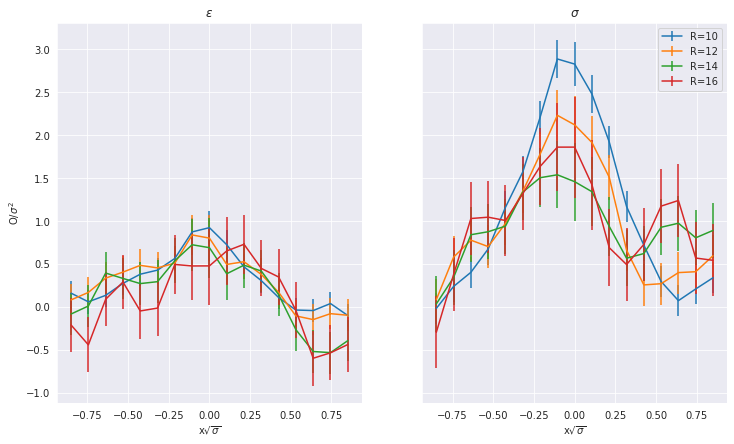

<Figure size 432x288 with 0 Axes>

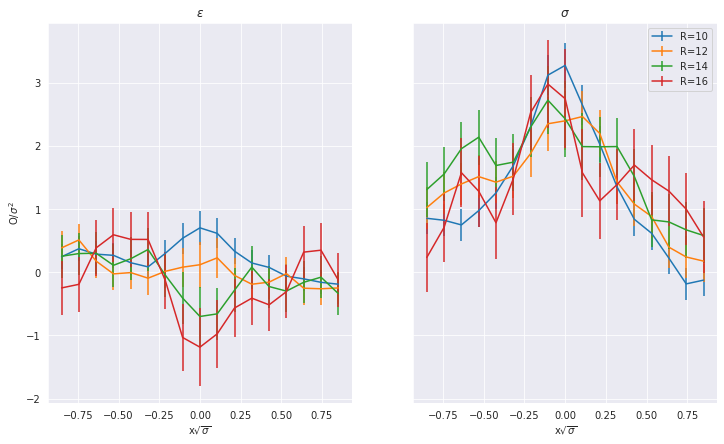

<Figure size 432x288 with 0 Axes>

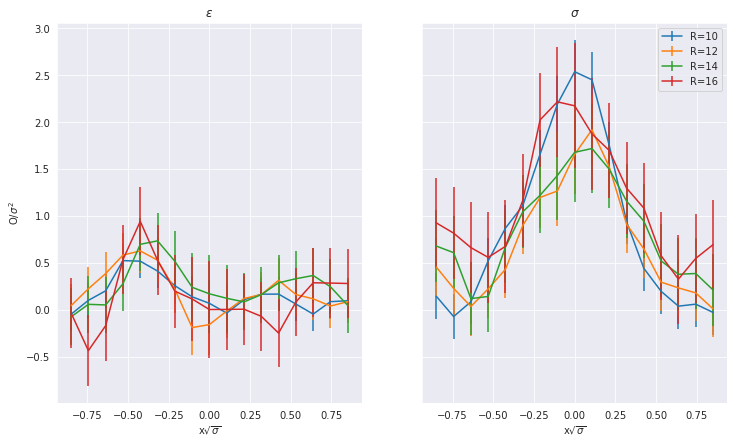

<Figure size 432x288 with 0 Axes>

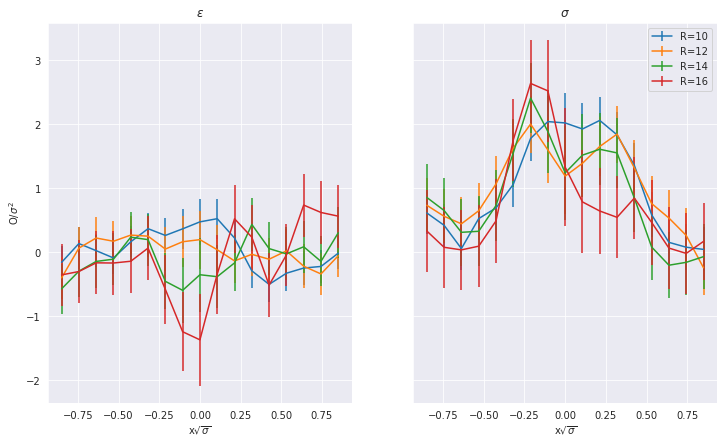

<Figure size 432x288 with 0 Axes>

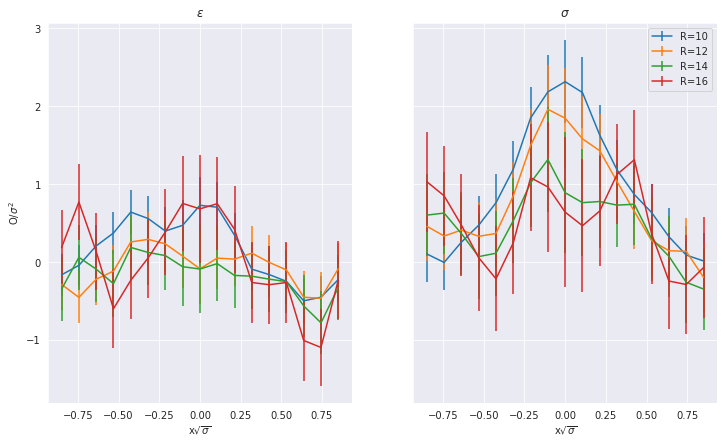

<Figure size 432x288 with 0 Axes>

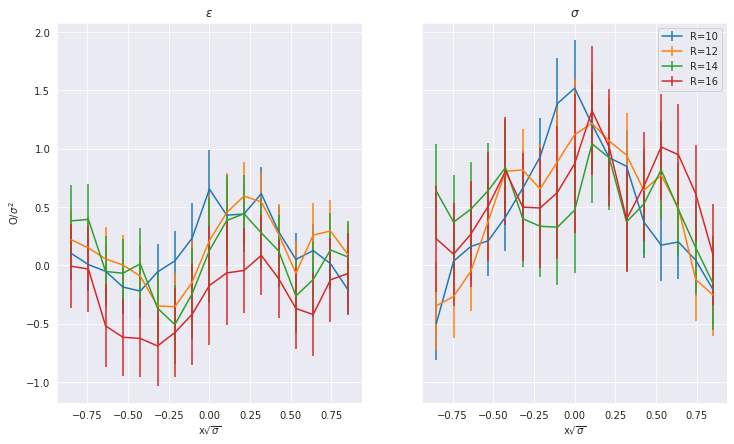

<Figure size 432x288 with 0 Axes>

In [30]:
mu1=[0, 10, 15, 25, 30, 40]
T1=[10]
for mu in mu1:
    for T in T1:
        R=[10, 12, 14, 16]
        make_plots_R(mu, T, R, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", (r"$\epsilon$", r"$\sigma$"), ('energy', 'action'), 'transversal')

[0.05472104 0.68715851]


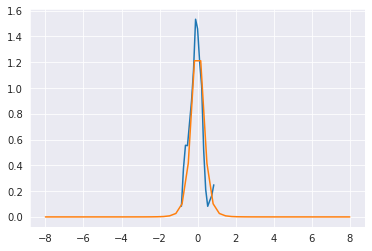

In [72]:
from scipy.optimize import curve_fit

def plot_func(function, x1, x2):
    xdata = np.linspace(x1, x2, 50)
    ydata = dipole(xdata, 0.05472104, 0.68715851)
    plt.plot(xdata, ydata)

def dipole(x, a, b):
    return a*4*b/(b**2+x**2)**3

def fit_x(data, function):
    popt, pcov = curve_fit(function, data[0], data[1])
    return popt

mu=0
w=mu//10
q=mu-w*10
T=10
R=12
data = read_file('/home/ilya/lattice/flux_tube/result/unsmeared_plaket/transversal/time_32/mu0.%d%d/electric_T=%d_R=%d' % (w, q, T, R))
print(fit_x(data, dipole))
plt.plot(data[0], data[1])
plot_func(dipole, -8, 8)

R=16


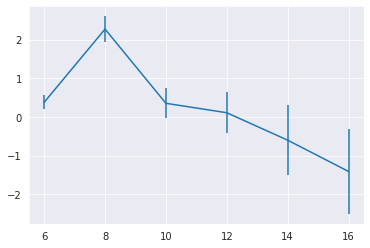

<Figure size 432x288 with 0 Axes>

In [13]:
mu=40
delta = 0
T = [6, 8, 10, 12, 14, 16]
R = [16]
for i in R:
    print('R=%d' % (i))
    T_dependence(mu, i, T, delta)

10 8


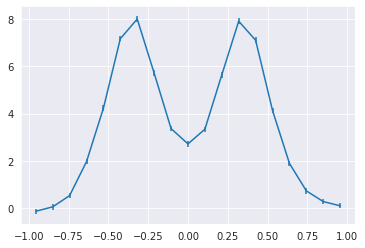

10 10


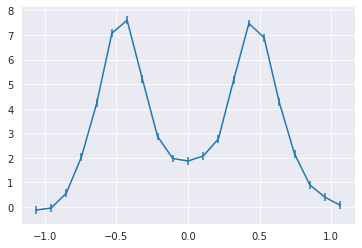

10 12


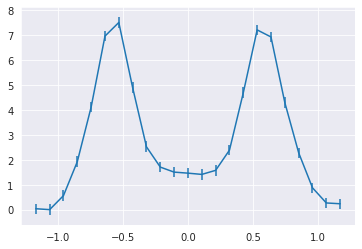

10 14


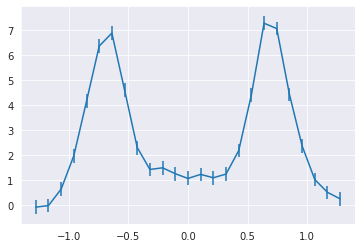

10 16


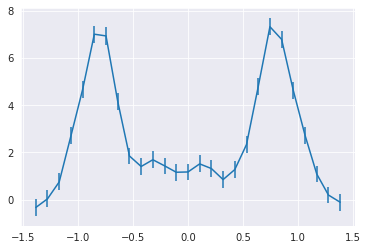

10 18


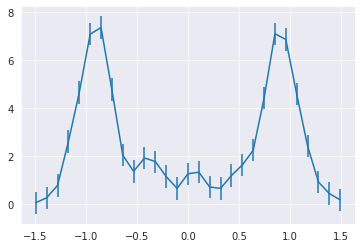

10 20


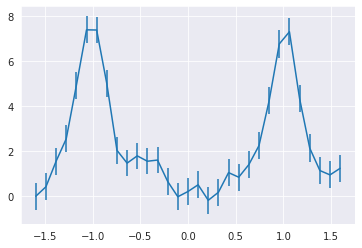

10 22


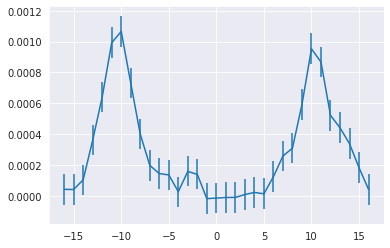

<Figure size 432x288 with 0 Axes>

In [10]:
mu=0
T=10
plaket='unsmeared_plaket'
data_plot(mu, T, 8, plaket)
data_plot(mu, T, 10, plaket)
data_plot(mu, T, 12, plaket)
data_plot(mu, T, 14, plaket)
data_plot(mu, T, 16, plaket)
data_plot(mu, T, 18, plaket)
data_plot(mu, T, 20, plaket)
data_plot(mu, T, 22, plaket)

12 8


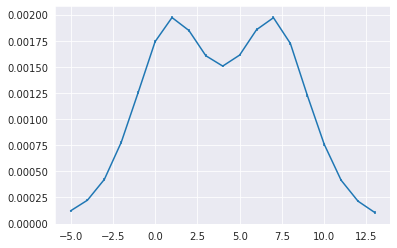

12 10


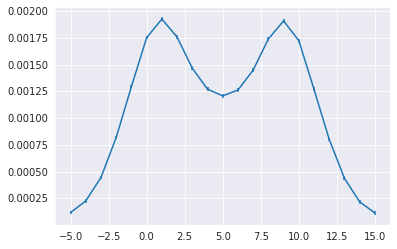

12 12


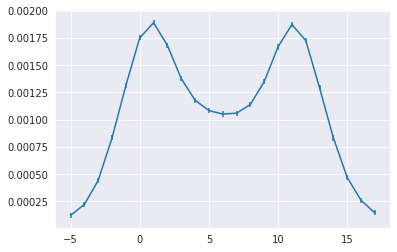

12 14


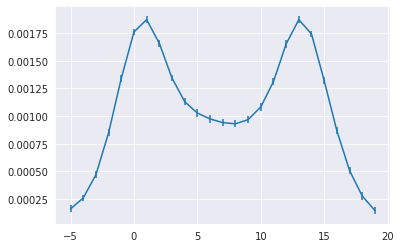

12 16


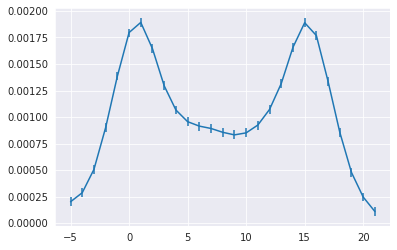

12 18


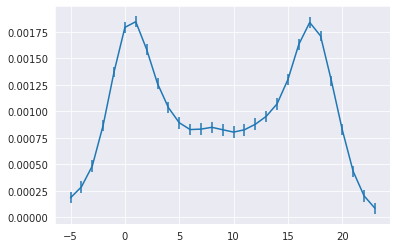

12 20


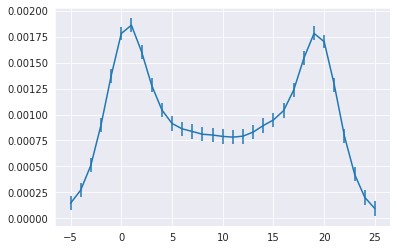

12 22


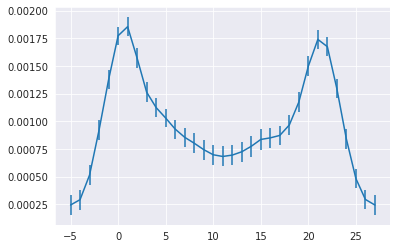

<Figure size 432x288 with 0 Axes>

In [46]:
mu=10
T=12
plaket='smeared_plaket_withhyp'
data_plot(mu, T, 8, plaket)
data_plot(mu, T, 10, plaket)
data_plot(mu, T, 12, plaket)
data_plot(mu, T, 14, plaket)
data_plot(mu, T, 16, plaket)
data_plot(mu, T, 18, plaket)
data_plot(mu, T, 20, plaket)
data_plot(mu, T, 22, plaket)